## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [32]:
# Initial imports
import os
import pandas as pd
#from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# Read your api key environment variable
# Load environment variables and retrieve the News API key
#load_dotenv()
api_key = '1509b1534a864e968c5072bca69ac***'
from newsapi import NewsApiClient


In [35]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [36]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
)

# Show the total number of news
bitcoin_news["totalResults"]

11311

In [ ]:
bitcoin_news

In [37]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
)

# Show the total number of news
ethereum_news["totalResults"]

5415

In [ ]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['description'])
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"]
      
        bitcoin_sentiment.append({
            "Title": title,
            "Description": description,
            "Text": text,
            "Date": date,
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create dataframe
btc_df = pd.DataFrame(bitcoin_sentiment)

# Preview dataframe
btc_df.head()

In [39]:
type(btc_df['Text'])

pandas.core.series.Series

In [ ]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['description'])
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"]
      
        ethereum_sentiment.append({
            "Title": title,
            "Description": description,
            "Text": text,
            "Date": date,
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create dataframe
eth_df = pd.DataFrame(ethereum_sentiment)

# Preview dataframe
eth_df.head()

In [77]:
eth_df.shape

(99, 9)

In [41]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.058977,0.068520,0.083800,0.847680
std,0.421770,0.082902,0.084854,0.114216
min,-0.872000,0.000000,0.000000,0.523000
25%,-0.386825,0.000000,0.000000,0.770000
50%,0.000000,0.045000,0.076000,0.844500
75%,0.255800,0.122750,0.132250,0.950500
max,0.827100,0.306000,0.313000,1.000000


In [42]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.158726,0.085889,0.041010,0.873121
std,0.414982,0.091359,0.071781,0.113563
min,-0.880700,0.000000,0.000000,0.494000
25%,0.000000,0.000000,0.000000,0.797500
50%,0.077200,0.070000,0.000000,0.895000
75%,0.493900,0.127500,0.069000,0.988000
max,0.902200,0.372000,0.306000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum had the highest mean compound score. Bitcoin had the highest max compound score.

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords

# Create a list of stopwords
sw = set(stopwords.words('english'))

#set(stopwords.words('english'))
#print(stopwords)
# Expand the default stopwords list if necessary
#sw

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [53]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem]
    
    return tokens

In [54]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = btc_df['Text'].apply(tokenizer)
btc_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Venmo now lets you send crypto to other users ...,Paypal-owned money transfer service Venmo dipp...,Paypal-owned money transfer service Venmo dipp...,2023-04-28T19:20:15Z,0.0000,0.000,0.000,1.000,"[paypalowned, money, transfer, service, venmo,..."
1,Bitcoin Pyramid Scheme Fraudster Ordered to Pa...,The Commodities Futures Trading Commission pat...,The Commodities Futures Trading Commission pat...,2023-04-28T14:35:25Z,0.4215,0.077,0.036,0.886,"[the, commodities, futures, trading, commissio..."
2,White House proposes 30 percent tax on electri...,The Biden administration wants to impose a 30 ...,The Biden administration wants to impose a 30 ...,2023-05-03T09:03:42Z,-0.2960,0.000,0.050,0.950,"[the, biden, administration, want, to, impose,..."
3,The Hidden Dangers of the Decentralized Web,"From social networks to crypto, independently ...","When Elon Musk took over Twitter last year, ma...",2023-05-19T12:00:00Z,-0.0772,0.067,0.120,0.813,"[when, elon, musk, took, over, twitter, last, ..."
4,"Hacker Pleads Guilty to Hijacking Barack, Elon...",A man accused of hacking Twitter accounts in a...,A man accused of hacking Twitter accounts in a...,2023-05-10T15:51:00Z,-0.7906,0.000,0.182,0.818,"[a, man, accused, of, hacking, twitter, accoun..."


In [55]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = eth_df['Text'].apply(tokenizer)
eth_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Venmo now lets you send crypto to other users ...,Paypal-owned money transfer service Venmo dipp...,Paypal-owned money transfer service Venmo dipp...,2023-04-28T19:20:15Z,0.0000,0.000,0.000,1.000,"[paypalowned, money, transfer, service, venmo,..."
1,Bitcoin could jump nearly 70% if the US defaul...,"""So actually, the optimal trade would probably...",Bitcoin.Photo by Getty Images\r\n<ul>\n<li>Bit...,2023-04-29T12:30:06Z,0.4144,0.140,0.000,0.860,"[bitcoinphoto, by, getty, imagesullibitcoin, c..."
2,Axie Infinty: Origins launches on iOS in LATAM...,Sky Mavis is launching Axie Infinity: Origins ...,Connect with top gaming leaders in Los Angeles...,2023-05-17T09:00:00Z,0.0000,0.000,0.000,1.000,"[connect, with, top, gaming, leader, in, los, ..."
3,The Cairo Programming Language,Comments,Cairo is a programming language designed for a...,2023-05-02T08:24:28Z,0.0000,0.000,0.000,1.000,"[cairo, is, a, programming, language, designed..."
4,Funds of every Trust Wallet browser extension ...,Key Takeaways: Seed generation of Trust Wallet...,Key Takeaways:\r\n<ul><li>Seed generation of T...,2023-05-01T10:44:00Z,0.2500,0.116,0.094,0.789,"[key, takeawaysulliseed, generation, of, trust..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [56]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [57]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('paypalowned', 'money'): 1,
 ('money', 'transfer'): 1,
 ('transfer', 'service'): 1,
 ('service', 'venmo'): 1,
 ('venmo', 'dipped'): 1,
 ('dipped', 'it'): 1,
 ('it', 'toe'): 1,
 ('toe', 'into'): 1,
 ('into', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'in'): 1}

In [58]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('paypalowned', 'money'): 1,
 ('money', 'transfer'): 1,
 ('transfer', 'service'): 1,
 ('service', 'venmo'): 1,
 ('venmo', 'dipped'): 1,
 ('dipped', 'it'): 1,
 ('it', 'toe'): 1,
 ('toe', 'into'): 1,
 ('into', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'in'): 1}

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('the', 127),
 ('char', 99),
 ('a', 93),
 ('and', 59),
 ('of', 56),
 ('to', 51),
 ('on', 51),
 ('in', 49),
 ('stock', 40),
 ('de', 27)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('the', 163),
 ('a', 100),
 ('char', 97),
 ('of', 71),
 ('to', 57),
 ('and', 57),
 ('ethereum', 56),
 ('it', 44),
 ('is', 43),
 ('in', 40)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

<ipython-input-62-0a1ecd929acc>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


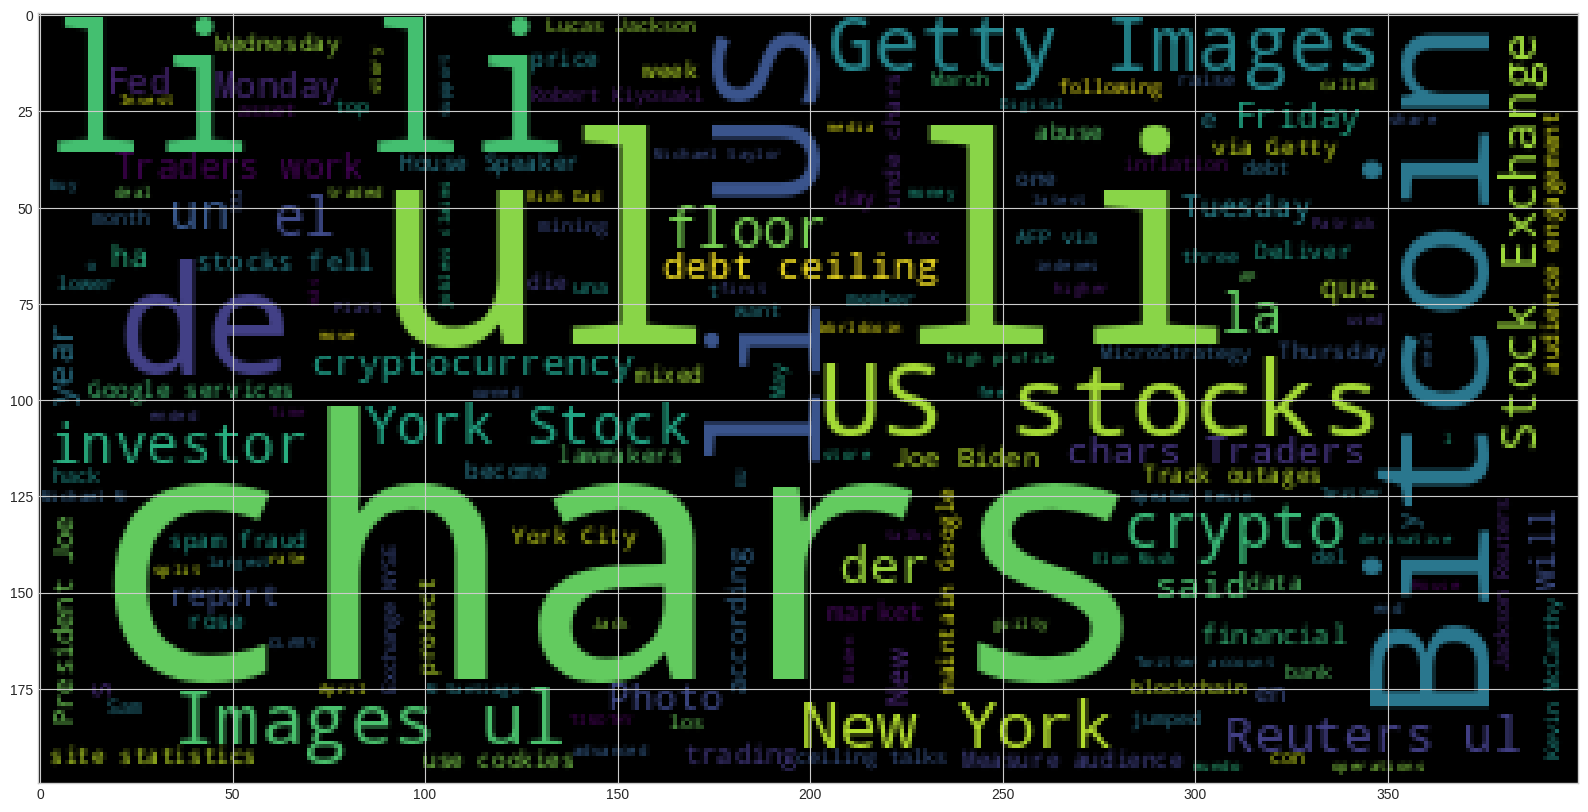

In [63]:
# Generate the Bitcoin word cloud
bitcoin_text = ' '.join(btc_df.Text)
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

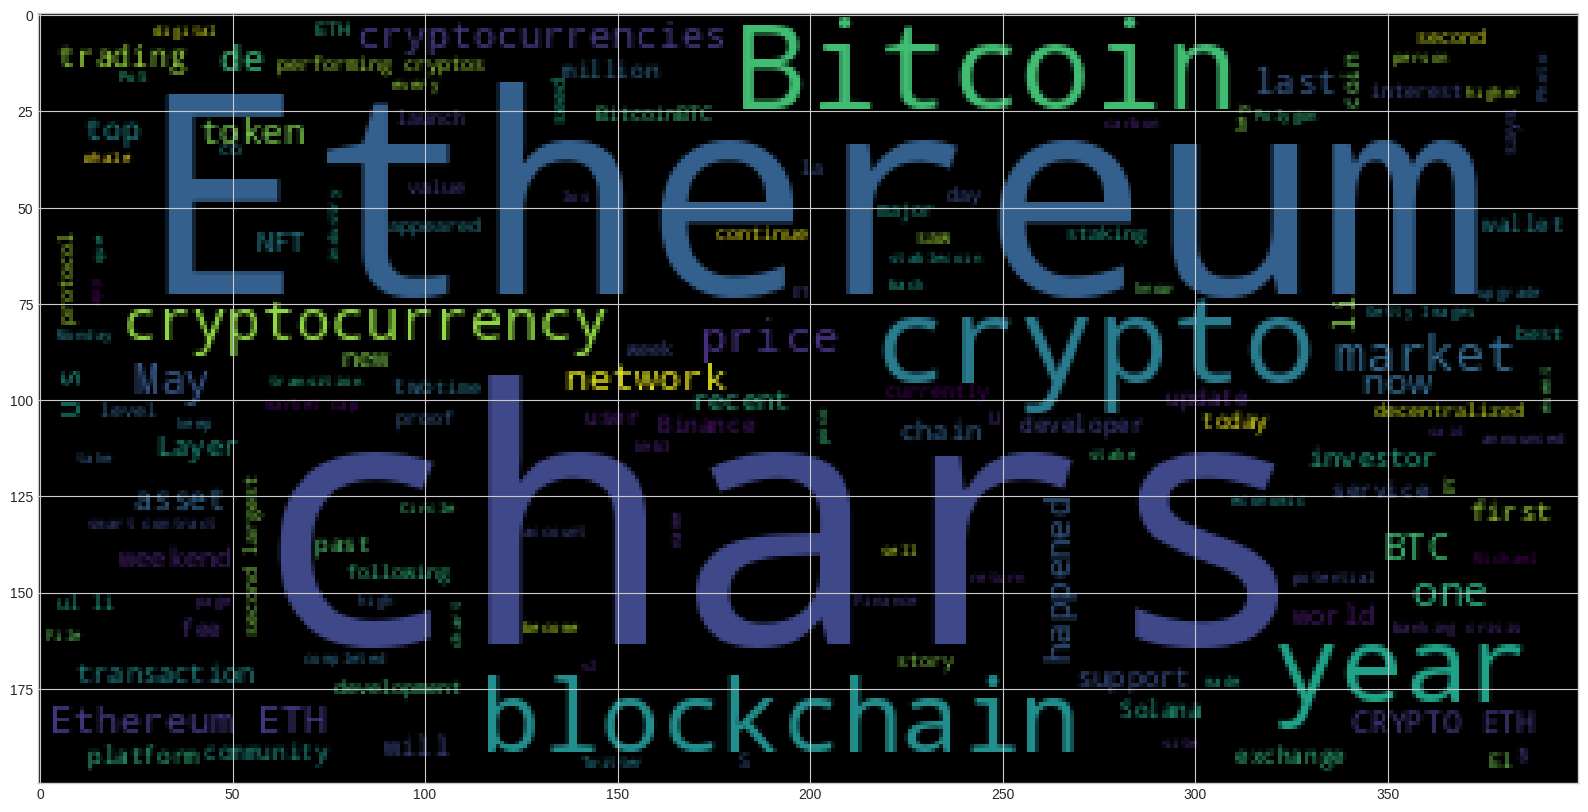

In [64]:
# Generate the Ethereum word cloud
ethereum_text = ' '.join(eth_df.Text)
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [65]:
import spacy
from spacy import displacy

In [66]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [67]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [68]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(btc_df.Text)

In [69]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [70]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

'<h2 style="margin: 0">Bitcoin NER</h2>\n\n<div class="entities" style="line-height: 2.5; direction: ltr">Paypal-owned money transfer service \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Venmo\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n dipped its toes into cryptocurrencies in \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    2021\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n after opening up an in-app trading platform.\r</br> That was just for individuals to buy or sell crypto. Now, the co… [+1625 chars] \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em

In [71]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

Venmo PERSON
2021 DATE
The Commodities Futures Trading Commission ORG
Biden PERSON
30 percent PERCENT
the fiscal year of 2024 DATE
Elon Musk PERSON
last year DATE
Mastodon GPE
Mastodon PERSON
one CARDINAL
Twitter PERSON
Bitcoin NORP
Tuesday DATE
Google ORG
Google ORG
Google ORG
Google ORG
Google ORG
Terraform Labs ORG
Han Chong-joon PERSON
months DATE
Monteneg PERSON
2020 DATE
Twitter PRODUCT
2020 DATE
Twitter PRODUCT
Bitcoin PERSON
Tether ORG
Wednesday DATE
USDT ORG
15% PERCENT
Getty Images ORG
Bitcoin PERSON
next year DATE
Bob Ras PERSON
BitcoinYuichiro Chino/Getty Images PERSON
Steve Hanke PERSON
Gary Harmon PERSON
US GPE
District Court ORG
Ohio GPE
more than 712 CARDINAL
four years DATE
Getty Images ORG
Bitcoin PERSON
20,000 MONEY
US GPE
Standard Chartered's ORG
Geoff Kendrick PERSON
Robert Kiyosaki PERSON
Robert Kiyosaki PERSON
Robert Kiyosaki PERSON
US GPE
downturn.</li ORG
MicroStrategy ORG
Michael SaylorJoe Raedle/Getty Images PERSON
Michael Saylor's PERSON
MicroStrategy ORG
fi

---

### Ethereum NER

In [72]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(eth_df.Text)

In [73]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [76]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

'<h2 style="margin: 0">Ethereum NER</h2>\n\n<div class="entities" style="line-height: 2.5; direction: ltr">Paypal-owned money transfer service \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Venmo\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n dipped its toes into cryptocurrencies in \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    2021\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n after opening up an in-app trading platform.\r</br> That was just for individuals to buy or sell crypto. Now, the co… [+1625 chars] Bitcoin.Photo by \n<mark class="entity" style="background: #7aecec; pad

In [75]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

Venmo PERSON
2021 DATE
Getty Images ORG
Bitcoin PERSON
20,000 MONEY
US GPE
Standard Chartered's ORG
Geoff Kendrick PERSON
Los Angeles GPE
2023 DATE
May 22-23 DATE
the Apple App Store LAW
Cairo GPE
CPU ORG
Key Takeaways LOC
only 32 QUANTITY
second ORDINAL
Steve Heap/Shutterstock
Ethereum PERSON
second ORDINAL
just two CARDINAL
3 MONEY
2022 DATE
Web3 LOC
the first half of the year DATE
Twitter PRODUCT
MicroStrategy ORG
Michael Saylor PERSON
Marco Bello/Getty Images PERSON
MicroStrategy PERSON
Michael Saylor PERSON
Pepe the Frog WORK_OF_ART
Hong Kong GPE
AP Photo/Kin Cheung ORG
over $1 billion MONEY
this month DATE
Shiba Inu ORG
Shiba Inu ORG
Shibarium PERSON
Bitcoin PERSON
Ethereum ORG
ETH ORG
two CARDINAL
Bitcoin PERSON
about 80% PERCENT
the year DATE
Ethereum ORG
years DATE
El Banco Central de Argentina ORG
Un ORG
NFT ORG
NFT ORG
NFT ORG
NFT ORG
Fish lover PERSON
NFT ORG
ETH ORG
second ORDINAL
second ORDINAL
these days DATE
Phil Rosen PERSON
Monday DATE
First Republic Bank ORG
JPMorgan

---